In [ ]:
# Viewing Excel Data
# Word Analysis

In [1]:
# import pandas as pd
# import glob
# filelist = glob.glob('./data/*.xlsx')

# result = []
# for no, i in enumerate(filelist):
#     print( no ,'/', len(filelist), 'is working...')
#     df = pd.read_excel(i)
#     result.append(df)
# df = pd.concat(result, axis=0)

# # df.to_csv('./data/study.csv')  # Saving Full texts 
# df_sum = df.ix[:,['학교명','문서제목','월','날짜']]
# df_sum.to_csv('./words_sum.csv')
# print('done')

# Texts Analysis
# 텍스트 분석 실행하기
1. 문서 생산 건수 순 기관 목록
2. 문서 생산 건수 월별 분포
3. 최다 빈도 단어

In [1]:
import pandas as pd
df = pd.read_csv('./data/words.csv')
df = df.ix[:,1:]
df.shape  
# 총 7,794,764 개의 문서목록을 분석  (780만개의 문서목록)

# .ix is deprecated. Please use
# .loc for label based indexing or
# .iloc for positional indexing

/home/markbaum/Python/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


(7794764, 4)

In [2]:
print(df[df.문서제목.isna()].shape) 
df[df.문서제목.isna()]
# 전체 데이터중 44개에는 NaN으로 제목이 없다
# 때문에 이들 44개를 제외한 나머지를 대상으로 분석을 시작

(44, 4)


,학교명,문서제목,월,날짜
170230,경기여자상업고등학교,NaN,8,20160830
580910,선덕고등학교,NaN,9,20160902
1023702,도봉중학교,NaN,9,20160902
1223485,정의여자고등학교,NaN,9,20160902
1461780,정의여자중학교,NaN,9,20160902
1488621,창동중학교,NaN,9,20160902
1495110,창북중학교,NaN,9,20160902
1501785,창일중학교,NaN,9,20160902
1536924,건국대학교사범대학부속중학교,NaN,5,20160531
1549603,광남중학교,NaN,5,20160531


In [3]:
df = df.dropna()

## <strong>1 문서수 분석
value_counts

In [4]:
# 전체 1302개의 학교의 발행 문서수를 내림차순 정렬
names = df.학교명
paper_counts = pd.DataFrame(pd.value_counts(names))
paper_counts.head(20)

,학교명
덕수고등학교,8153
서울공업고등학교,8100
경기기계공업고등학교,7623
서울문화고등학교,7531
선린인터넷고등학교,7366
용산고등학교,7319
성동공업고등학교,7275
경기고등학교,7269
용산공업고등학교,7264
경복고등학교,7233


## <strong>2 월별 문서수 분석
value_counts

In [5]:
# 전체 1302개의 학교의 발행 문서수를 내림차순 정렬
names = df.월
monthly = pd.DataFrame(pd.value_counts(names))
monthly = monthly.sort_index(axis=0, ascending=True)
monthly

,월
1,422058
2,589030
3,997751
4,716744
5,669706
6,671494
7,549829
8,446959
9,645504
10,659059


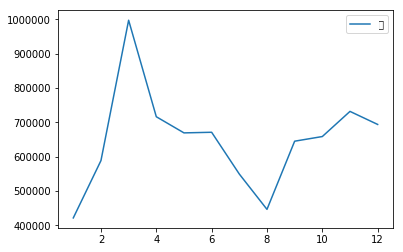

In [6]:
%matplotlib inline
monthly.plot(kind='line')

## <strong>3 최다 빈도단어
Word_counts

### <strong> 01 Words Counts
단어갯수 확인하기

In [81]:
# # words 를 1개 문장으로 만들기
# from functools import reduce
# text = reduce(lambda x, y : x + ' ' + y, df.문서제목[:10000])
# text[:200]

In [86]:
df[:10]

,학교명,문서제목,월,날짜
0,신진과학기술고등학교,생활기록부 팩스 발급 협조 요청,6,20160614
1,신진과학기술고등학교,"2016학년도 9월 고1,2 전국연합학력평가 응시 인원 입력 안내",6,20160614
2,신진과학기술고등학교,2016학년도 7월 고3 전국연합학력평가 실시 요강 알림,6,20160614
3,신진과학기술고등학교,2016 귀국자 편입학 시행계획 변경 알림,6,20160614
4,신진과학기술고등학교,2017학년도 육군사관학교 지원자 고교학교장 추천 안내,6,20160614
5,신진과학기술고등학교,학교급식소 식기세척제 사용 및 관리 철저,6,20160614
6,신진과학기술고등학교,『안전한 학교 시설관리』교육과정 안내 및 대상자 추천 요청,6,20160614
7,신진과학기술고등학교,2015개정 교육과정에 따른 초중등학교 디지털교과서 국검정 구분(안) 행정예고 알림,6,20160614
8,신진과학기술고등학교,특성화학교대상 '2016 주니어 소프트웨어(SW) 창작대회' 참가 협조요청,6,20160614
9,신진과학기술고등학교,기간제교원 임용서류 이관 요청,6,20160614


In [115]:
def monthly_words(df, month, slice_cloud):
    # word List 생성
    import matplotlib
    matplotlib.rc('font', family='NanumGothic');
    from time import time
    from functools import reduce
    t0 = time()
    names = df[df.월 == month].문서제목                                 # 30,000건 : 1분정도 소요

    result = []
    for i in range(int(names.shape[0]/10000)):
        text = list(map(lambda x : x.split(' '), names[i*10000: (i+1)*10000] ))         # 개별 list로 분할
        text = reduce(lambda x,y : x + y, text)                   # 분할된 list를 1개로 합친다
        result.append(text)
        if i % 5 == 0: print(i ,'/', int(names.shape[0]/10000))
    result_mix = reduce(lambda x,y : x+y, result)
    
    # 중복된 표현 단일처리 [list] to {Counted Dict}
    dicts = {}
    for txts in result_mix:
        if txts not in dicts:
            dicts[txts] = 1
        dicts[txts] += 1
    temps = {}
    value_2015, value_2016, value_2017 = 0, 0, 0
    year_2015 = ['2015년', '2015', '2015년도', '2015학년도', '「2015', '2015.']
    year_2016 = ['2016년', '2016', '2016년도', '2016학년도', '「2016', '2016.']
    year_2017 = ['2017년', '2017', '2017년도', '2017학년도', '「2017', '2017.']
    for key, value in dicts.items():
        if key in year_2015:   value_2015 += value
        elif key in year_2016: value_2016 += value
        elif key in year_2017: value_2017 += value
            
    # 년도에 따른 다양한 표현 dict를 삭제
    for year in year_2015:
        try: del dicts[year]
        except: pass
    for year in year_2016:
        try: del dicts[year]
        except: pass
    for year in year_2017:
        try: del dicts[year]
        except: pass
    dicts['2015년'] = value_2015
    dicts['2016년'] = value_2016
    dicts['2017년'] = value_2017

    # 불용어 삭제
    keys, values = [], []
    commonWords = '및','위한','관련','따른','등','건','관한','시','날','인한','중','서울','자료'
    for txt, counts in dicts.items():
        if txt not in commonWords:
            keys.append(txt)
            values.append(counts)
    df = pd.DataFrame([keys, values]).T
    df.columns = ['텍스트', '갯수']
    df = df.sort_values('갯수', ascending=False)
    if str(month) == 1:
        month = '0'+str(month)
    else : str(month)
    df.to_csv('./result/words_' + str(month) + '_list.csv', encoding='ms949', index=None)
    
    # df to top_dict to build Word Cloud
    df = df.iloc[:slice_cloud, :]
    c_text = {}    
    for ind in range(len(df)):
        c_text[df.iloc[ind,0]] = df.iloc[ind,1]    
    
    # {dict로} 변환 뒤 word cloud 를 출력하기
    from wordcloud import WordCloud
    wcloud = WordCloud(#font_path='./fonts/JejuGothic.ttf',
                       font_path='./fonts/SDSwaggerTTF.ttf',
                       relative_scaling = 0.2, background_color ='white').generate_from_frequencies(c_text)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,8))
    plt.imshow(wcloud)    
    plt.savefig('./result/Wc_'+ str(month) +'.png')
    time = time()-t0
    print(round(time,2), 'sec')
    print(int(time/60),'min', int(time//60),'sec')

In [112]:
for i in range(1,13):
    print(i, 'Month analysis is start!!')
    monthly_words(df, i, 50)

0 / 5
21.1 sec
0 min 0 sec


In [ ]:
result = []
for txt in names:
    text = list(map(lambda x : x.split(' '), names ))         # 개별 list로 분할
    text = reduce(lambda x,y : x + y, text)                   # 분할된 list를 1개로 합친다
    len(text)    

In [4]:
result = []
text = list(map(lambda x : x.split(' '), names ))         # 개별 list로 분할
text = reduce(lambda x,y : x + y, text)                   # 분할된 list를 1개로 합친다
len(text)

209466

In [5]:
text[:10]

['생활기록부', '팩스', '발급', '협조', '요청', '2016학년도', '9월', '고1,2', '전국연합학력평가', '응시']

### <strong> 02 불용어 삭제 및 value 합치기
단어갯수 확인하기

In [7]:
# 불용어 사전 삭제하기
commonWords = '및','위한','관련','따른','등','건','관한','시','날','인한','중','서울','자료'

import pandas as pd
texts = pd.Series(text)
text_boolean = list(map(lambda x : x not in commonWords , text))
texts = texts[text_boolean]
texts = texts.tolist()
len(texts)

196856

In [8]:
# word counts
import nltk
school = nltk.Text(texts, name='문서제목')
results = school.vocab().most_common()
results

[('안내', 13862),
 ('2016년', 5199),
 ('알림', 4304),
 ('요청', 4299),
 ('2016', 3441),
 ('제출', 3228),
 ('2016학년도', 2753),
 ('신청', 2551),
 ('협조', 2484),
 ('2016년도', 1767),
 ('계획', 1661),
 ('운영', 1454),
 ('2017학년도', 1143),
 ('추천', 1117),
 ('대상자', 1043),
 ('연수', 1007),
 ('학교', 1005),
 ('현황', 922),
 ('참석', 882),
 ('모집', 862),
 ('개최', 833),
 ('참가', 769),
 ('특성화고', 756),
 ('실시', 755),
 ('직무연수', 704),
 ('명단', 684),
 ('홍보', 670),
 ('지원', 656),
 ('결과', 628),
 ('조사', 595),
 ('학생', 578),
 ('공모', 533),
 ('고등학교', 513),
 ('요구자료', 511),
 ('교부', 492),
 ('프로그램', 489),
 ('학교급식', 487),
 ('참여', 475),
 ('추가', 462),
 ('교육', 452),
 ('배부', 437),
 ('중등', 435),
 ('대상', 416),
 ('통보', 415),
 ('하반기', 412),
 ('사립학교', 401),
 ('청소년', 401),
 ('일정', 399),
 ('철저', 387),
 ('2017년', 373),
 ('변경', 355),
 ('교원', 352),
 ('송부', 342),
 ('한부모가족', 339),
 ('상반기', 333),
 ('지급', 327),
 ('교육과정', 325),
 ('학적조회', 325),
 ('의뢰', 316),
 ('활용', 313),
 ('추진', 312),
 ('2017', 304),
 ('조회', 304),
 ('「2016', 293),
 ('표창', 293),
 ('선정', 280),
 ('201

In [11]:
# 중복된 내용 합친 새로운 결과를 출력
value_2016 = 0
value_2017 = 0
result_list = []
for no, result in enumerate(results):
    if result[0] in ['2016년', '2016', '2016년도', '2016학년도', '「2016', '2016.']:
        value_2016 += result[1]
    elif result[0] in ['2017년', '2017', '2017년도', '2017학년도', '「2017', '2017.']:
        value_2017 += result[1]
    else :
        result_list.append(result)

fin = [('2016년', value_2016), ('2017년', value_2017)]
fin = fin + result_list
# print('total_sum :', value)
fin

[('2016년', 13727),
 ('2017년', 2074),
 ('안내', 13862),
 ('알림', 4304),
 ('요청', 4299),
 ('제출', 3228),
 ('신청', 2551),
 ('협조', 2484),
 ('계획', 1661),
 ('운영', 1454),
 ('추천', 1117),
 ('대상자', 1043),
 ('연수', 1007),
 ('학교', 1005),
 ('현황', 922),
 ('참석', 882),
 ('모집', 862),
 ('개최', 833),
 ('참가', 769),
 ('특성화고', 756),
 ('실시', 755),
 ('직무연수', 704),
 ('명단', 684),
 ('홍보', 670),
 ('지원', 656),
 ('결과', 628),
 ('조사', 595),
 ('학생', 578),
 ('공모', 533),
 ('고등학교', 513),
 ('요구자료', 511),
 ('교부', 492),
 ('프로그램', 489),
 ('학교급식', 487),
 ('참여', 475),
 ('추가', 462),
 ('교육', 452),
 ('배부', 437),
 ('중등', 435),
 ('대상', 416),
 ('통보', 415),
 ('하반기', 412),
 ('사립학교', 401),
 ('청소년', 401),
 ('일정', 399),
 ('철저', 387),
 ('변경', 355),
 ('교원', 352),
 ('송부', 342),
 ('한부모가족', 339),
 ('상반기', 333),
 ('지급', 327),
 ('교육과정', 325),
 ('학적조회', 325),
 ('의뢰', 316),
 ('활용', 313),
 ('추진', 312),
 ('조회', 304),
 ('표창', 293),
 ('선정', 280),
 ('소요조회', 273),
 ('교육급여', 270),
 ('관리전환', 261),
 ('2015학년도', 255),
 ('산학일체형', 253),
 ('', 252),
 ('협조요청', 251),
 

In [13]:
keys = [txt[0] for txt in fin]
value = [txt[1] for txt in fin]

key_value = pd.DataFrame([keys, value]).T
key_value.columns = ['텍스트', '갯수']
key_value.sort_values('갯수', ascending=False)
# key_value.reset_index(drop=True)

In [14]:
keys

['2016년',
 '2017년',
 '안내',
 '알림',
 '요청',
 '제출',
 '신청',
 '협조',
 '계획',
 '운영',
 '추천',
 '대상자',
 '연수',
 '학교',
 '현황',
 '참석',
 '모집',
 '개최',
 '참가',
 '특성화고',
 '실시',
 '직무연수',
 '명단',
 '홍보',
 '지원',
 '결과',
 '조사',
 '학생',
 '공모',
 '고등학교',
 '요구자료',
 '교부',
 '프로그램',
 '학교급식',
 '참여',
 '추가',
 '교육',
 '배부',
 '중등',
 '대상',
 '통보',
 '하반기',
 '사립학교',
 '청소년',
 '일정',
 '철저',
 '변경',
 '교원',
 '송부',
 '한부모가족',
 '상반기',
 '지급',
 '교육과정',
 '학적조회',
 '의뢰',
 '활용',
 '추진',
 '조회',
 '표창',
 '선정',
 '소요조회',
 '교육급여',
 '관리전환',
 '2015학년도',
 '산학일체형',
 '',
 '협조요청',
 '방과후학교',
 '설명회',
 '예산',
 '유의사항',
 '시행',
 'NCS',
 '대비',
 '사업',
 '학부모',
 '예방',
 '찾아가는',
 '참석자',
 '업무',
 '대한',
 '도제학교',
 '공고',
 '채용',
 '대학수학능력시험',
 '자녀',
 '2015년',
 '확인',
 '수요조사',
 '교사',
 '전국연합학력평가',
 '2학기',
 '2차',
 '담당자',
 '나이스',
 '선발',
 '1학기',
 '서울특별시교육연수원',
 '서울특별시',
 '현황)',
 '워크숍',
 '신입생',
 '기반',
 '저소득',
 '의견',
 '학교폭력',
 '개정',
 '전국기능경기대회',
 '참가자',
 '1차',
 '사항',
 '2015',
 '제51회',
 '맞춤형',
 '점검',
 '공모전',
 '설문조사',
 '불용물품',
 '사용',
 '관리',
 '교직원',
 '강화',
 '설치',
 '협의회',
 '교장',
 '1/4분기',


### <strong> 03 Words Cloud
단어 구름지도 만들기 (상위 20개의 단어를 추출)

In [82]:
c_text = dict(fin[:20])
c_text

{'2016년': 13727,
 '2017년': 2074,
 '개최': 833,
 '결과': 628,
 '계획': 1661,
 '고등학교': 513,
 '공모': 533,
 '교부': 492,
 '교원': 352,
 '교육': 452,
 '대상': 416,
 '대상자': 1043,
 '명단': 684,
 '모집': 862,
 '배부': 437,
 '변경': 355,
 '사립학교': 401,
 '송부': 342,
 '신청': 2551,
 '실시': 755,
 '안내': 13862,
 '알림': 4304,
 '연수': 1007,
 '요구자료': 511,
 '요청': 4299,
 '운영': 1454,
 '일정': 399,
 '제출': 3228,
 '조사': 595,
 '중등': 435,
 '지원': 656,
 '직무연수': 704,
 '참가': 769,
 '참석': 882,
 '참여': 475,
 '철저': 387,
 '청소년': 401,
 '추가': 462,
 '추천': 1117,
 '통보': 415,
 '특성화고': 756,
 '프로그램': 489,
 '하반기': 412,
 '학교': 1005,
 '학교급식': 487,
 '학생': 578,
 '한부모가족': 339,
 '현황': 922,
 '협조': 2484,
 '홍보': 670}

In [84]:
import matplotlib
matplotlib.rc('font', family='NanumGothic');
from wordcloud import WordCloud
wcloud = WordCloud(#font_path='./fonts/JejuGothic.ttf',
                   font_path='./fonts/SDSwaggerTTF.ttf',
                   relative_scaling = 0.2, background_color ='white').generate_from_frequencies(c_text)

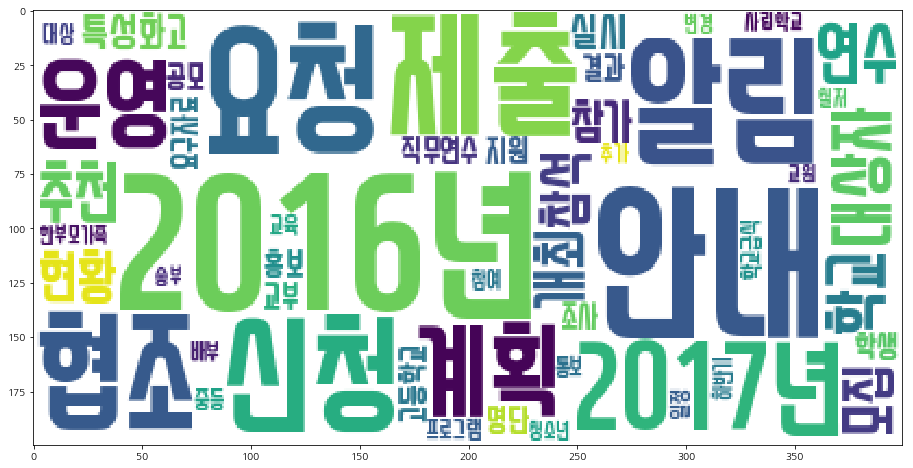

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.imshow(wcloud)
plt.show()

In [30]:
# 1. 최다 빈도 단어
# 2. 문서 생산 건수 순 기관 목록
# 3. 문서 생산 건수 월별 분포
# 등 전문가가 데이타 분석 후 가능한 결과물

In [12]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
# String_form = {'NNB': '일반 의존 명사', 'NNM': '단위 의존 명사',
#                'VA': '형용사', 'VXV': '보조 동사',
#                'EF': '종결 어미', 'EPH': '존칭 선어말 어미', 'MD': '관형사', 'SE': '줄임표 <...> 성 어미','EC': '연결 어미', 
#                'MDT': '일반 관형사',  'JKM': '부사격 조사', 'VC': '지정사'}

In [13]:
kkma.nouns(u'한국어 분석은 재밌습니다!')

['한국어', '분석']

In [14]:
kkma.morphs(u'한국어 분석은 재밌습니다!')

['한국어', '분석', '은', '재밌', '습니다', '!']

In [15]:
print(kkma.pos(u'한국어 분석은 재밌습니다!'))

[('한국어', 'NNG'), ('분석', 'NNG'), ('은', 'JX'), ('재밌', 'VA'), ('습니다', 'EFN'), ('!', 'SF')]


In [16]:
words = kkma.pos(u'한국어 분석을 바나나 같은 마음으로 바나나를 먹는 모습은 먹으므로 재밌습니다!')
words

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JX'),
 ('바나나', 'NNG'),
 ('같', 'VA'),
 ('은', 'ETD'),
 ('마음', 'NNG'),
 ('으로', 'JKM'),
 ('바나나', 'NNG'),
 ('를', 'JKO'),
 ('먹', 'VV'),
 ('는', 'ETD'),
 ('모습', 'NNG'),
 ('은', 'JX'),
 ('먹', 'VV'),
 ('으므로', 'ECD'),
 ('재밌', 'VA'),
 ('습니다', 'EFN'),
 ('!', 'SF')]